In [14]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, Layout


import sys
sys.path.append('../pyfiles')
from database import *


sys.executable
print(sys.executable)
print(sys.version)
print(sys.version_info)
!conda info

/home/aniederberger/anaconda3/bin/python
3.8.11 (default, Aug  3 2021, 15:09:35) 
[GCC 7.5.0]
sys.version_info(major=3, minor=8, micro=11, releaselevel='final', serial=0)

     active environment : base
    active env location : /home/aniederberger/anaconda3
            shell level : 1
       user config file : /home/aniederberger/.condarc
 populated config files : /home/aniederberger/.condarc
          conda version : 4.10.3
    conda-build version : 3.21.4
         python version : 3.8.11.final.0
       virtual packages : __linux=5.4.0=0
                          __glibc=2.27=0
                          __unix=0=0
                          __archspec=1=x86_64
       base environment : /home/aniederberger/anaconda3  (writable)
      conda av data dir : /home/aniederberger/anaconda3/etc/conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/linux-64
                          https://repo.anaconda.com/pkgs/main/noarch
                         

In [8]:
dataset = load()

X, y, labels_inv_map, labels_map = extract_data_array(dataset)

X_train, X_test, y_train, y_test = split_data(X,y)

In [15]:
def run_pca(X_train, y_train,  mean_widget, std_widget, x_widget, labels_map= labels_map, labels_inv_map= labels_inv_map):
    
    
    
    ss= StandardScaler(with_mean=mean_widget,with_std=std_widget)
    train_data= ss.fit_transform(X_train)
    
    pca = decomposition.PCA(n_components=4)
    pc = pca.fit_transform(train_data)
    chosen_labels =np.array([labels_map.get(name) for name in x_widget.value])
    ix_true = np.argwhere(np.in1d(y_train, chosen_labels)).flatten()
    
    pc = pca.transform(X_train[ix_true, ...])
    
    pc_df = pd.DataFrame(data = pc ,
        columns = ['PC1', 'PC2','PC3','PC4'])
    pc_df['Species'] = np.array([labels_inv_map.get(label_nr) for label_nr in y_train[ix_true]])
    
    
    sns.lmplot( x="PC1", y="PC2",
               data=pc_df,
               fit_reg=False,
               hue='Species', # color by cluster
               legend=True,
               scatter_kws={"s": 32})
    plt.show()
    
    
def load_widgets():
    """
    Load and display the Jupyter widgets    
    """

    species = list(sorted(set(dataset.species)))


    # Setting options
    x_widget = widgets.SelectMultiple(options = species, value=["Magnolia Heptapeta"], 
                                      description="Species:", disabled=False,
                                      layout=Layout(display="flex", flex_flow='column'))

    mean_widget = widgets.Checkbox(value=True, description='Scale by Mean:')
    std_widget = widgets.Checkbox(value=True, description='Scale by Std:')

    button_widget = widgets.Button(description='Run simulation',
                                   disabled=False,
                                   button_style='', tooltip='Run simulation')
    
    def run_all(ev):
        display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))

    button_widget.on_click(run_all)


    # Display
    display(x_widget)
    display(mean_widget)
    display(std_widget)
    #display(button_widget)

    return x_widget, mean_widget, std_widget, button_widget 


def load_widgets():
    """
    Load and display the Jupyter widgets
    """

    species = list(sorted(set(dataset.species)))

    # Setting options
    x_widget = widgets.SelectMultiple(options=species, value=["Magnolia Heptapeta"],
                                      description="Species:", disabled=False,
                                      layout=Layout(display="flex", flex_flow='column'))

    mean_widget = widgets.Checkbox(value=True, description='Scale by Mean:')
    std_widget = widgets.Checkbox(value=True, description='Scale by Std:')

    button_widget = widgets.Button(description='Run simulation',
                                   disabled=False,
                                   button_style='', tooltip='Run simulation')

    def run_all(ev):
        """display(Javascript(
            'IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))"""

        display(widgets.VBox(
            [
                mean_widget,
                std_widget,
                button_widget
            ]
        )
        )


    button_widget.on_click(run_all)

    # Display
    display(x_widget)
    display(mean_widget)
    display(std_widget)
    # display(button_widget)

    return x_widget, mean_widget, std_widget, button_widget

In [16]:
x_widget, mean_widget, std_widget, button_widget= load_widgets()

SelectMultiple(description='Species:', index=(40,), layout=Layout(display='flex', flex_flow='column'), options…

Checkbox(value=True, description='Scale by Mean:')

Checkbox(value=True, description='Scale by Std:')

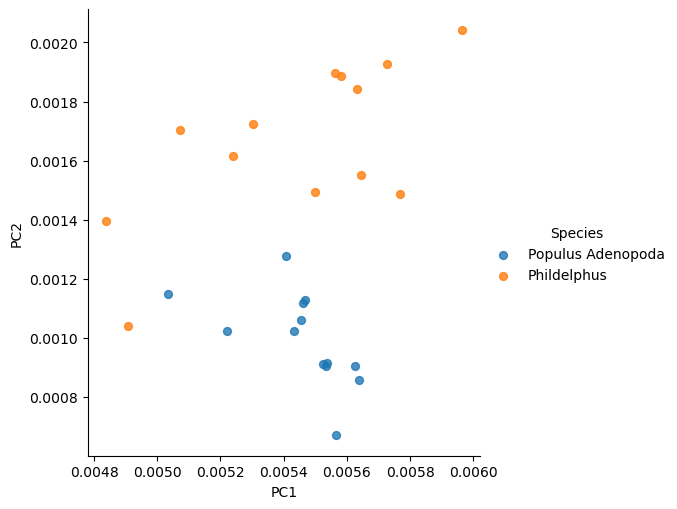

In [18]:
run_pca(X_train, y_train,  mean_widget, std_widget, x_widget)